## Predicting house sale price for Boulder County, Colorado - Modeling

### Introduction: <br>
I would like to help all market participants make better and more informed decisions when participating in Boulder County residential real estate market. 
Some important questions are: 
<dd>1. What property features are important in contributing to sales price
<dd>2. What neighbourhoods are popular and add additional value and which don’t
<dd>3. See the distribution of the properties for each area <br>
    
It can help all market participants, either people looking to enter the market and make a choice that fits their needs and budget or for people in the market to optimize their real estate asset management. 


### Feature description

'Eff Yr Built'
'Above Grd SF'
'Basemt Tot SF'
'Basemt Fin SF'
'Garage SF'
'Est Land SF'
'Unincorporated'
'Quality_cat',
'Garage Attached'
       
       'Design_1 Sty Townh'
       'Design_1-Sty Twnhm Condo'    
       'Design_Bi Level'
       'Design_Det 1 Sty Condo'      
       'Design_Det Mult Sty Condo'
       'Design_Modular'
       'Design_Multi Sty'       
       'Design_Multi Sty Condo'
       'Design_Multi Sty Townh'    
       'Design_Mutli Sty Twnhm Condo'
       'Design_Paired'
       'Design_Patio'
       'Design_Ranch'
       'Design_Split level'
       
       'Market Area_101'
       'Market Area_102'
       'Market Area_103'
       'Market Area_104',
       'Market Area_105'
       'Market Area_106'
       'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', 'Market Area_630',
       'Market Area_632', 'Market Area_633', 'Market Area_634'
       
       'Time Adjust Sales Price'



### 1. Import necessary libraries and data

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.decomposition import PCA

In [7]:
X = pd.read_csv('data/data_for_modeling.csv')


In [9]:
features = X.loc[:,['Eff Yr Built', 'Above Grd SF', 'Basemt Tot SF', 'Basemt Fin SF',
       'Garage SF', 'Est Land SF', 'Unincorporated', 'Quality_cat',
       'Garage Attached', 'Design_1 Sty Townh', 'Design_1-Sty Twnhm Condo',
       'Design_Bi Level', 'Design_Det 1 Sty Condo',
       'Design_Det Mult Sty Condo', 'Design_Modular', 'Design_Multi Sty',
       'Design_Multi Sty Condo', 'Design_Multi Sty Townh',
       'Design_Mutli Sty Twnhm Condo', 'Design_Paired', 'Design_Patio',
       'Design_Ranch', 'Design_Split level', 'Market Area_101',
       'Market Area_102', 'Market Area_103', 'Market Area_104',
       'Market Area_105', 'Market Area_106', 'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', 'Market Area_630',
       'Market Area_632', 'Market Area_633', 'Market Area_634' ]]
Y = X['Time Adjust Sales Price']


## Linear regression model

It is important to build linear regression model to use as a both benchmark and most interpretable and computationally light model. <br>
Question 1: Do we need to standardize the variables? <br>
Answer: No. In general, you do not need to center or standardize your data for multiple regression. Different explanatory variables are almost always on different scales (i.e., measured in different units). This is not a problem; the betas are estimated such that they convert the units of each explanatory variable into the units of the response variable appropriately. 

In [18]:
X_train_const = sm.add_constant(features)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_train_const, Y, test_size = 0.25, train_size = 0.75)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(X_test.columns)

(20127, 49)
(6710, 49)
Index(['const', 'Eff Yr Built', 'Above Grd SF', 'Basemt Tot SF',
       'Basemt Fin SF', 'Garage SF', 'Est Land SF', 'Unincorporated',
       'Quality_cat', 'Garage Attached', 'Design_1 Sty Townh',
       'Design_1-Sty Twnhm Condo', 'Design_Bi Level', 'Design_Det 1 Sty Condo',
       'Design_Det Mult Sty Condo', 'Design_Modular', 'Design_Multi Sty',
       'Design_Multi Sty Condo', 'Design_Multi Sty Townh',
       'Design_Mutli Sty Twnhm Condo', 'Design_Paired', 'Design_Patio',
       'Design_Ranch', 'Design_Split level', 'Market Area_101',
       'Market Area_102', 'Market Area_103', 'Market Area_104',
       'Market Area_105', 'Market Area_106', 'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', '

In [25]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Time Adjust Sales Price   R-squared:                       0.771
Model:                                 OLS   Adj. R-squared:                  0.771
Method:                      Least Squares   F-statistic:                     1472.
Date:                     Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                             11:43:38   Log-Likelihood:            -2.7586e+05
No. Observations:                    20127   AIC:                         5.518e+05
Df Residuals:                        20080   BIC:                         5.522e+05
Df Model:                               46                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.305e+06   2.48e+05     -9.298      0.000   -2.79e+06   -1.82e+06
Eff Yr Built                  1347.3839    137.002      9.835      0.000    1078.849    1615.918
Above Grd SF                   190.3098      3.803     50.047      0.000     182.856     197.763
Basemt Tot SF                  -31.7734      4.153     -7.651      0.000     -39.913     -23.634
Basemt Fin SF                   96.1792      3.997     24.065      0.000      88.345     104.013
Garage SF                       47.2651      3.506     13.480      0.000      40.393      54.138
Est Land SF                      2.1587      0.133     16.171      0.000       1.897       2.420
Unincorporated                  6.7e+04   1.01e+04      6.659      0.000    4.73e+04    8.67e+04
Quality_cat                   5.962e+04   1160.534     51.369      0.000    5.73e+04    6.19e+04
Garage Attached              -6.384e+04   4553.760    -14.019      0.000   -7.28e+04   -5.49e+04
Design_1 Sty Townh           -9.053e+04   3.57e+04     -2.535      0.011   -1.61e+05   -2.05e+04
Design_1-Sty Twnhm Condo      5.076e+04   1.82e+04      2.787      0.005    1.51e+04    8.65e+04
Design_Bi Level              -8372.6848   2.11e+04     -0.396      0.692   -4.98e+04    3.31e+04
Design_Det 1 Sty Condo        7.428e+04   9.74e+04      0.763      0.446   -1.17e+05    2.65e+05
Design_Det Mult Sty Condo     3.176e+05    4.4e+04      7.215      0.000    2.31e+05    4.04e+05
Design_Modular               -1.553e+05   7.33e+04     -2.120      0.034   -2.99e+05   -1.17e+04
Design_Multi Sty             -1.178e+05   1.95e+04     -6.035      0.000   -1.56e+05   -7.96e+04
Design_Multi Sty Condo        4.982e+04   9308.555      5.352      0.000    3.16e+04    6.81e+04
Design_Multi Sty Townh       -1.369e+05   3.31e+04     -4.140      0.000   -2.02e+05   -7.21e+04
Design_Mutli Sty Twnhm Condo   3.17e+04   9890.699      3.205      0.001    1.23e+04    5.11e+04
Design_Paired                -1.193e+05   2.44e+04     -4.883      0.000   -1.67e+05   -7.14e+04
Design_Patio                 -1.409e+05   2.51e+04     -5.624      0.000    -1.9e+05   -9.18e+04
Design_Ranch                 -5.359e+04   1.92e+04     -2.796      0.005   -9.12e+04    -1.6e+04
Design_Split level            -3.28e+04   1.99e+04     -1.650      0.099   -7.18e+04    6153.179
Market Area_101               7.964e+05   1.44e+04     55.454      0.000    7.68e+05    8.25e+05
Market Area_102               2.291e+05   1.41e+04     16.279      0.000    2.01e+05    2.57e+05
Market Area_103               5.782e+05   1.41e+04     41.150      0.000    5.51e+05    6.06e+05
Market Area_104               7.058e+04   1.73e+04      4.090      0.000    3.68e+04    1.04e+05
Market Area_105      

T-stats look good for all coefficients except unincorporated. https://bouldercounty.gov/government/about-boulder-county/unincorporated-towns/

The Durbin-Watson is right around 2 and between 1.5 and 2.5, so autocorrelation is likely not a cause for concern.


In [27]:
linear_pred = results.predict(X_test)
R2 = 1 - (np.sum((y_test-linear_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Test set R2: ",R2)
rmse = mean_squared_error(y_test, linear_pred, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

Test set R2:  0.7739605833601315


In [28]:
residuals = np.asarray(y_test - results.predict(X_test))

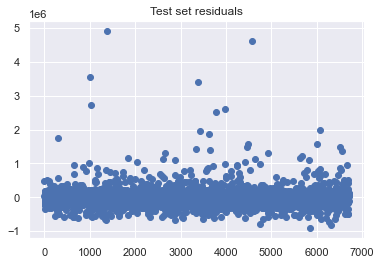

4921486.871670193


In [31]:
sns.set()
plt.plot(residuals, 'bo')
plt.title('Test set residuals')
plt.show()
print(max(residuals))


Now let's look at the residual's qqplot. 

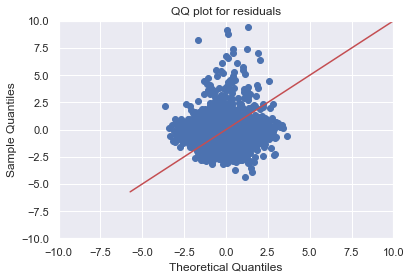

In [38]:
residuals.shape
reshaped =np.reshape(residuals, (-1, 1))
scaler = StandardScaler()
scaler.fit(reshaped)
stand_resid =scaler.transform(reshaped)
fig = sm.qqplot(stand_resid, line='45')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("QQ plot for residuals")
plt.show()

Residuals do not seem to be normally distributed. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


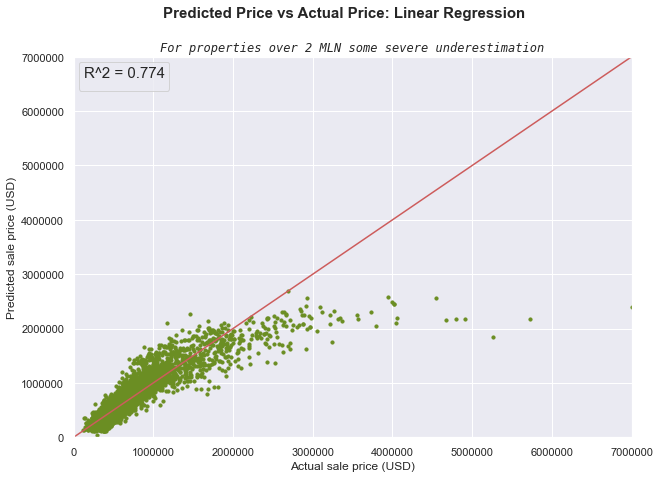

In [40]:

sns.set()
fig = plt.figure(figsize=(10, 7))


# Build a scatterplot
x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')

plt.scatter(y_test, results.predict(X_test),s=10, c='olivedrab')
plt.xlim(0,7000000)
plt.ylim(0,7000000)

plt.ticklabel_format(useOffset=False, style='plain')

# Label it nicely
plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')

plt.suptitle('Predicted Price vs Actual Price: Linear Regression', fontsize=15,fontweight='bold')
plt.title("For properties over 2 MLN some severe underestimation",style='italic',family='monospace')

plt.legend(title='R^2 = 0.774', title_fontsize = 15) 
plt.show()


Clearly, there is a problem. The more expensive properties are not properly priced under linear regression model, howewer for properties under 1.5 million USD the fit is great. 

### Principal Component Analysis <br>
We perform exploratory PCA to see if the features could be combined in Principal Components which represent significant proportion of the variation.

In [ ]:
#remove the constant for sm linear regression
X_test = X_test.iloc[:,1:]
X_train =X_train.iloc[:,1:]

In [42]:
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(X_train)
Scaled_data=scaling.transform(X_train)
 
# Set the n_components=15
principal = PCA(n_components=15)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)

In [43]:
principal.explained_variance_ratio_

array([0.08608745, 0.04897758, 0.04541996, 0.03903289, 0.03202988,
       0.02901338, 0.0275402 , 0.02678314, 0.02510311, 0.02417169,
       0.02357376, 0.02345064, 0.02286244, 0.02259414, 0.0217991 ])

In [44]:
cumulative = np.cumsum(principal.explained_variance_ratio_)

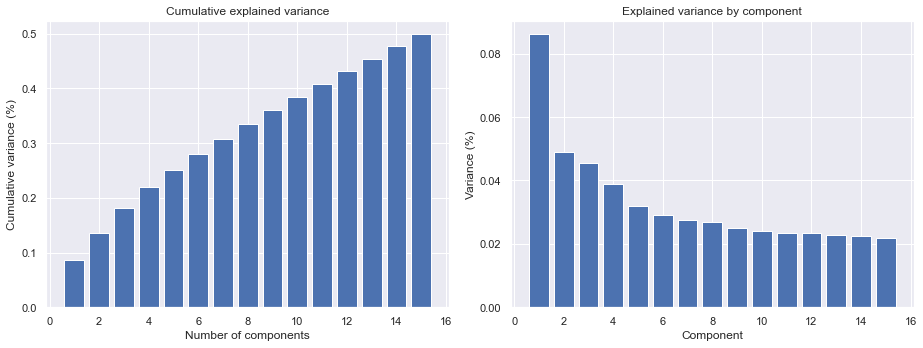

In [46]:
fig.suptitle('Principal component analysis')

plt.subplots(figsize=(13, 5))
plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plt.bar(range(1,16), cumulative )
plt.title('Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance (%)')

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2).bar(range(1,16), principal.explained_variance_ratio_ )
plt.title('Explained variance by component')
plt.xlabel('Component')
plt.ylabel('Variance (%)')

plt.tight_layout()

In [47]:
#Check the values of eigen vectors
# prodeced by principal components
principal.components_[0]

array([ 2.22044605e-16,  2.65898941e-01,  4.19250711e-01,  3.90305030e-01,
        2.46584164e-01,  3.02033458e-02,  1.69313364e-01,  1.76542813e-02,
        3.39200226e-01,  2.86971899e-01, -2.34854965e-02, -5.99558983e-02,
       -2.42340620e-02, -4.98782995e-03, -1.04613152e-02, -8.92932246e-03,
        3.25917141e-01, -1.28811909e-01, -8.93228743e-02, -9.94876892e-02,
        2.06944807e-02,  1.16808476e-02, -1.71824906e-02, -2.22439681e-02,
        1.18051288e-02,  5.91278702e-02,  5.37836664e-02, -3.16595370e-02,
        8.62605368e-04,  9.11459957e-04, -9.37996490e-03, -6.11023798e-02,
       -3.41880435e-02,  5.22200799e-02,  8.91627924e-02,  3.43485904e-02,
        1.37047964e-01,  8.24288404e-02, -3.98970345e-02,  8.29129257e-02,
       -7.28628931e-02,  1.33196686e-01,  3.84642411e-02, -5.27010830e-02,
        7.18897864e-02, -2.15898384e-01, -1.28335729e-01, -1.08878486e-01,
       -1.60251626e-02])

Text(0, 0.5, 'pc2')

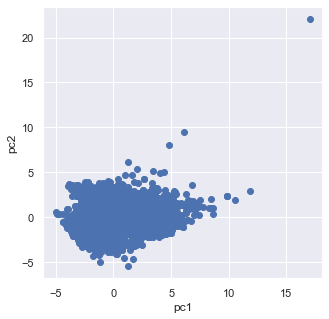

In [49]:
plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1])

plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

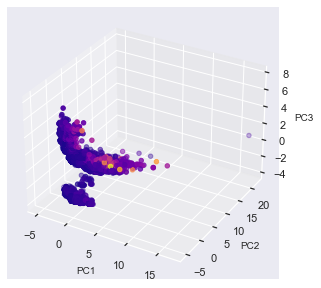

In [51]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=y_train, cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [52]:
# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

[0.08608745 0.04897758 0.04541996 0.03903289 0.03202988 0.02901338
 0.0275402  0.02678314 0.02510311 0.02417169 0.02357376 0.02345064
 0.02286244 0.02259414 0.0217991 ]


Well, it looks like first 3 components don't explain much of the variance, certainly not around 80% level. I would not use them in this case and instead use original features.

### Decision tree 
#### Model 1: Entropy model - no max_depth

In [53]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeRegressor()

# Call fit() on entr_model
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred =pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeRegressor()

In [54]:
#tree.plot_tree(entr_model)

In [55]:
R2 = 1 - (np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
print(R2)

0.7032574940286878


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


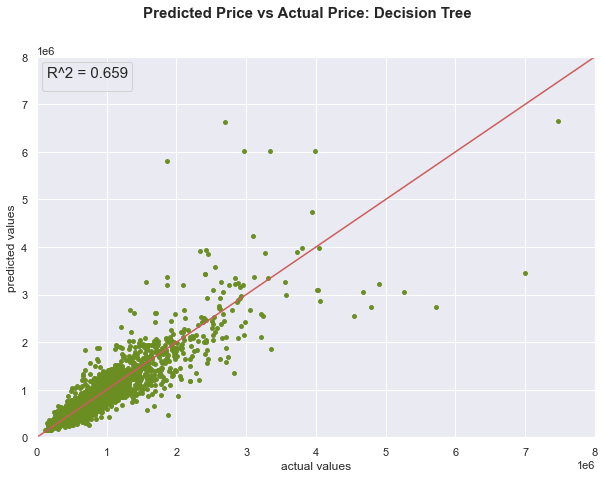

In [66]:
sns.set()
fig = plt.figure(figsize=(10, 7))

# Build a scatterplot
x = np.linspace(0,8000000,)
plt.plot(x,x, color = 'indianred')
plt.ylim((0,8000000))
plt.xlim((0,8000000))
plt.scatter(y_test, y_pred, s=15,color='olivedrab')

plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.suptitle('Predicted Price vs Actual Price: Decision Tree', fontsize=15,fontweight='bold')
plt.title("",style='italic',family='monospace')


plt.legend(title='R^2 = 0.659', title_fontsize = 15) 

plt.show()

R squared 0f 0.659 vs 0.771 for linear regression - not an improvement. However, it does look like the model mistreats everyone equally. 

### Polynomial regression

In [67]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 2, interaction_only=False)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train )

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [68]:
X_poly.shape

(20127, 1275)

In [69]:
X_poly

array([[1.000e+00, 1.000e+00, 2.005e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 2.004e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.984e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 1.000e+00, 2.014e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.986e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.990e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [70]:
polynom = lin2.predict(poly.fit_transform(X_test)) # predict on the test set

In [71]:
polynom

array([1636123.12084451,  442313.84446076,  607763.70239654, ...,
        380361.49251357,  261732.43613961,  522902.4007701 ])

In [72]:
R2 = 1 - (np.sum((y_test-polynom)**2)/np.sum((y_test-np.mean(y_test))**2))
print(R2)

0.9032015365609022


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


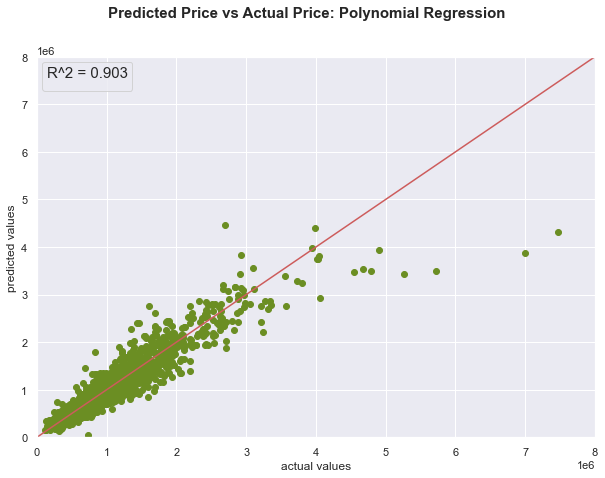

In [77]:
sns.set()
fig = plt.figure(figsize=(10, 7))

x = np.linspace(0,8000000,)
plt.plot(x,x, color = 'indianred')
plt.ylim((0,8000000))
plt.xlim((0,8000000))
plt.scatter(y_test, polynom, color='olivedrab')

plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.suptitle('Predicted Price vs Actual Price: Polynomial Regression', fontsize=15,fontweight='bold')
plt.title("",style='italic',family='monospace')
plt.legend(title='R^2 = 0.903', title_fontsize = 15) 
plt.show()

Well it looks like polynomial regression did a great job, with R^2 at 0.903 versus 0.643 for Descision tree and 0.767 for linear regression. To check for overfitting, I would like to calculate R2 on train set to see the difference between test and train set. 

In [78]:
poly_train = lin2.predict(poly.fit_transform(X_train)) # predict on the test set

In [79]:
poly_train = lin2.predict(poly.fit_transform(X_train)) # predict on the test set
R2 = 1 - (np.sum((y_train-poly_train)**2)/np.sum((y_train-np.mean(y_train))**2))
print(R2)

0.9110625970646185


Well R2 on train set is 0.912 and R2 on test set is 0.858, so there's some overfitting going on. Let's do predictions vs actuals plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


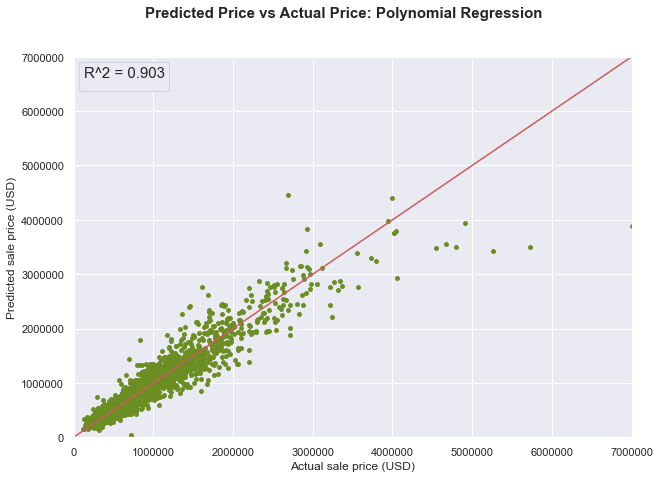

In [81]:
sns.set()
fig = plt.figure(figsize=(10, 7))

x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')
plt.scatter(y_test, polynom,s=15, c='olivedrab')
plt.xlim(0,7000000)
plt.ylim(0,7000000)

plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.suptitle('Predicted Price vs Actual Price: Polynomial Regression', fontsize=15,fontweight='bold')
plt.title("",style='italic',family='monospace')
plt.legend(title='R^2 = 0.903', title_fontsize = 15) 
plt.show()



Well this looks much much better, however the 3 million dollars and up the relationship doesn't seem to hold up as well, but those observations are not very numerous. I would like to investigate them and see what could drive that.  

## Multiple linear regression model with log transformed response

https://statmodeling.stat.columbia.edu/2019/08/21/you-should-usually-log-transform-your-positive-data/

From page 59:

It commonly makes sense to take the logarithm of outcomes that are all-positive.

If a variable has a narrow dynamic range (that is, if the ratio between the high and low values is close to 1), then it will not make much of a difference in fit if the regression is on the logarithmic or the original scale. . . . In such a situation, it might seem to make sense to stay on the original scale for reasons of simplicity. However, the logarithmic transformation can make sense even here, because coefficients are often more easily understood on the log scale. . . . For an input with a larger amount of relative variation (for example, heights of children, or weights of animals), it would make sense to work with its logarithm immediately, both as an aid in interpretation and likely an improvement in fit too.

In [82]:
# log 10 transform y_test and y_train

from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log10)
y_train_log  = transformer.transform(y_train)
y_test_log = transformer.transform(y_test)

In [83]:
10**y_test_log


8009     2.063926e+06
20628    4.877680e+05
21169    5.608636e+05
12447    3.482049e+05
169      6.437274e+05
             ...     
3484     6.473013e+05
1670     6.032143e+05
16404    4.438627e+05
25487    2.675440e+05
25568    4.783184e+05
Name: Time Adjust Sales Price, Length: 6710, dtype: float64

In [84]:
lin2 = LinearRegression()
reg = lin2.fit(X_train, y_train_log)


In [85]:
log_test = reg.predict(X_test) # predict on the test set
R2 = 1 - (np.sum((y_test_log-log_test)**2)/np.sum((y_test_log-np.mean(y_test_log))**2))
print("Test set R^2: ",R2)

log_train = reg.predict(X_train) # predict on the train set
R2 = 1 - (np.sum((y_train_log-log_train)**2)/np.sum((y_train_log-np.mean(y_train_log))**2))
print("Train set R^2: ",R2)


Test set R^2:  0.8994466082318326
Train set R^2:  0.8931040654940612


In [86]:
predicted_prices =10**log_test

In [87]:
predicted_prices

array([1754965.91286954,  459553.69300624,  534024.04940556, ...,
        385094.85770032,  289645.66854353,  484183.07341884])

In [88]:
R2 = 1 - np.sum((y_test -predicted_prices)**2)/np.sum((y_test-np.mean(y_test))**2)
print("Test set R^2: ", R2)

Test set R^2:  0.855985175060779


In [89]:
RMSE = mean_squared_error(y_test, predicted_prices, squared=False)

In [90]:
RMSE

169099.90672967833

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


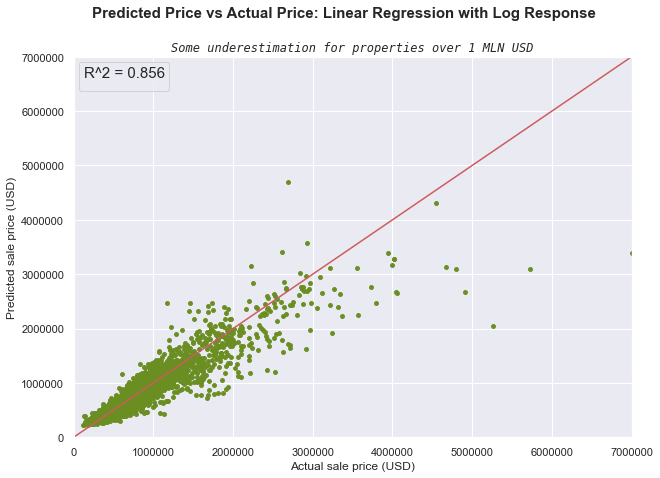

In [92]:
fig = plt.figure(figsize=(10, 7))

# Build a scatterplot
x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')

plt.scatter(y_test, predicted_prices,s=15, c='olivedrab')
plt.xlim(0,7000000)
plt.ylim(0,7000000)

plt.ticklabel_format(useOffset=False, style='plain')

# Label it nicely
plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')

plt.suptitle('Predicted Price vs Actual Price: Linear Regression with Log Response', fontsize=15,fontweight='bold')
plt.title("Some underestimation for properties over 1 MLN USD",style='italic',family='monospace')

plt.legend(title='R^2 = 0.856', title_fontsize = 15) 
plt.show()

In [93]:
print(
np.min(y_test_log),
np.max(y_test_log))

5.088888146997137 6.87345827577024


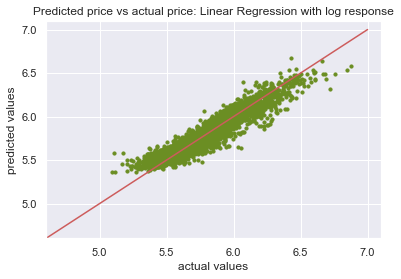

In [95]:
# Plot the predictions
plt.figure()

# Build a scatterplot
x = np.linspace(4,7,)
plt.plot(x,x, color = 'indianred')

plt.scatter(y_test_log, log_test ,s=10, c='olivedrab')
plt.xlim(4.6,7.1)
plt.ylim(4.6,7.1)


# Label it nicely
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Predicted price vs actual price: Linear Regression with log response')
plt.show()

Test set R^2:  0.8994466082318326 <br>
Train set R^2:  0.8931040654940612 <br> No overfitting at all. Let's confirm with cross-validation

In [103]:
transformer = FunctionTransformer(np.log10)
y_log  = transformer.transform(Y)
transformer = FunctionTransformer(np.log10)
y_log  = transformer.transform(Y)
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, features, y_log, cv=kf)

# Print scores
print(cv_scores)

# Print the mean
print("Mean R^2: ",np.mean(cv_scores))

# Print the standard deviation
print("Standard deviation R^2: ",np.std(cv_scores))

# Print the 95% confidence interval
print(np.percentile(cv_scores, [2.5, 97.5]))



[0.89109375 0.89944565 0.87648998 0.89703234 0.89801589 0.89608386]
Mean R^2:  0.8930269133272208
Standard deviation R^2:  0.007838852214960092
[0.87831546 0.89926693]


### Refit the model with stats models to get the summary output

In [98]:
X_train_const = sm.add_constant(features)
X_train, X_test, y_train, y_test = train_test_split(X_train_const, Y, test_size = 0.25, train_size = 0.75)
transformer = FunctionTransformer(np.log10)
y_train_log  = transformer.transform(y_train)

In [99]:
X_train.shape

(20127, 49)

In [100]:
model = sm.OLS(y_train_log,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Time Adjust Sales Price   R-squared:                       0.894
Model:                                 OLS   Adj. R-squared:                  0.893
Method:                      Least Squares   F-statistic:                     3668.
Date:                     Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                             12:06:46   Log-Likelihood:                 25105.
No. Observations:                    20127   AIC:                        -5.012e+04
Df Residuals:                        20080   BIC:                        -4.974e+04
Df Model:                               46                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.7107      0.080     21.481      0.000       1.555       1.867
Eff Yr Built                     0.0018    4.4e-05     41.238      0.000       0.002       0.002
Above Grd SF                  7.727e-05   1.23e-06     62.747      0.000    7.49e-05    7.97e-05
Basemt Tot SF                 2.267e-06   1.34e-06      1.695      0.090   -3.55e-07    4.89e-06
Basemt Fin SF                 3.153e-05   1.29e-06     24.532      0.000     2.9e-05     3.4e-05
Garage SF                     3.558e-05   1.11e-06     31.910      0.000    3.34e-05    3.78e-05
Est Land SF                   6.531e-07   4.28e-08     15.275      0.000    5.69e-07    7.37e-07
Unincorporated                   0.0423      0.003     13.250      0.000       0.036       0.049
Quality_cat                      0.0256      0.000     68.961      0.000       0.025       0.026
Garage Attached                 -0.0160      0.001    -10.912      0.000      -0.019      -0.013
Design_1 Sty Townh               0.1522      0.011     13.651      0.000       0.130       0.174
Design_1-Sty Twnhm Condo         0.0802      0.006     14.192      0.000       0.069       0.091
Design_Bi Level                  0.2197      0.007     32.168      0.000       0.206       0.233
Design_Det 1 Sty Condo           0.1123      0.031      3.594      0.000       0.051       0.174
Design_Det Mult Sty Condo        0.1616      0.013     12.468      0.000       0.136       0.187
Design_Modular                   0.0140      0.025      0.562      0.574      -0.035       0.063
Design_Multi Sty                 0.1906      0.006     30.302      0.000       0.178       0.203
Design_Multi Sty Condo           0.0589      0.003     19.870      0.000       0.053       0.065
Design_Multi Sty Townh           0.1464      0.010     14.053      0.000       0.126       0.167
Design_Mutli Sty Twnhm Condo     0.0708      0.003     22.611      0.000       0.065       0.077
Design_Paired                    0.1686      0.008     21.628      0.000       0.153       0.184
Design_Patio                     0.1923      0.008     23.234      0.000       0.176       0.208
Design_Ranch                     0.2135      0.006     34.578      0.000       0.201       0.226
Design_Split level               0.2129      0.006     33.195      0.000       0.200       0.225
Market Area_101                  0.3658      0.005     79.846      0.000       0.357       0.375
Market Area_102                  0.2005      0.004     44.717      0.000       0.192       0.209
Market Area_103                  0.2986      0.004     66.918      0.000       0.290       0.307
Market Area_104                  0.1721      0.006     31.107      0.000       0.161       0.183
Market Area_105      

All variables are significant except market areas 501 and 505. Durbin Watson is great.  R^2 is 0.894. <br>
However, there is an interesting thing going on with the coefficient values. 
Largest coefficients are for Market Areas ranging from -0.13 to 0.29, meaning being in a certain market area increases the value by 29% or decreases by 0.11%. <br>
All positive, but very small increases for year built and square footage variables.<br>
Extra 1000 SF of the house yields 8% increase in value.<br>
Extra 1000 SF increase in finished basement yields 3.1% in value.<br>
Extra 1000SF of garage yields 3.8% of value.<br>
Unfinished basement yields only 0.31% of the price increase.<br>
And one year of the house yields 0.2%
<br>
One level increase in quality leads to 2.55% increase in price. <br>




### XGBoost

In [104]:
import xgboost as xgb
import pandas as pd

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

lambdas = [1, 10, 100]
gammas =[0, 10, 100]
etas =[0, 0.2, 0.5]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":4}

# Create an empty list for storing rmses as a function of l2 complexity
rmses = []
parameters =[]

# Iterate over reg_params
for l1 in lambdas:
    for g1 in gammas:
        for e1 in etas:
            
            # Update l2 strength
            params["reg_lambda"] = l1
            params['min_split_loss'] = g1
            params['learning_rate'] = e1
            
            # Pass this updated param dictionary into cv
            cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=6, num_boost_round=15, early_stopping_rounds = 10, metrics="rmse", as_pandas=True, seed=123)

            # Append best rmse (final round) to rmses_l2
            rmses.append(cv_results["test-rmse-mean"].tail(1).values[0])
            #print(params)
            parameters.append(params)


In [105]:
#print(pd.DataFrame((params, rmses), columns=["l1","g1","e1","rmse"]))
print(min(rmses))
print(rmses)

168862.59675709074
[797686.1253248352, 200425.1654341926, 168862.59675709074, 797686.1253248352, 200425.1654341926, 168862.59675709074, 797686.1253248352, 200425.1654341926, 168862.59675709074, 797686.1253248352, 208330.56811102494, 177462.79057223198, 797686.1253248352, 208330.56811102494, 177462.79057223198, 797686.1253248352, 208330.56811102494, 177462.79057223198, 797686.1253248352, 233452.88535674335, 186483.74829544718, 797686.1253248352, 233452.88535674335, 186483.74829544718, 797686.1253248352, 233452.88535674335, 186483.74829544718]


So best rmse is 166008.08540206144 for model with 'reg_lambda': 1, 'min_split_loss': 0, 'learning_rate': 0.5. The first parameters are default values, but learning rate significantly decreases rmse. 

In [269]:
best_params={'objective': 'reg:squarederror', 'max_depth': 4, 'reg_lambda': 1, 'min_split_loss': 0, 'learning_rate': 0.5}

{}


<Figure size 720x2160 with 0 Axes>

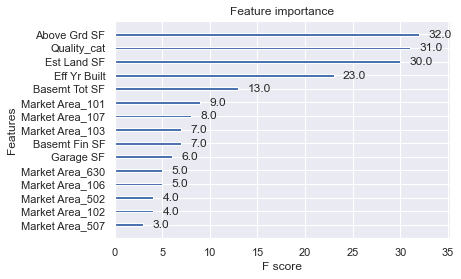

In [282]:
progress = dict()
xg_reg = xgb.train(params=best_params, dtrain=housing_dmatrix, num_boost_round=15,evals_result=progress)
print(progress)
fig = plt.figure(figsize=(10, 30))

sns.set()
# Plot the feature importances
xgb.plot_importance(xg_reg,max_num_features=15)#, show_values=False, importance_type='gain'
plt.show()

In [284]:
from sklearn.metrics import mean_squared_error

dtest_reg= xgb.DMatrix(data=X_test, label=y_test)
preds = xg_reg.predict(dtest_reg)
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 150982.546


In [285]:
R2 =1- ((150982.546)**2)*len(y_train)/ np.sum((y_train- np.mean(y_train))**2)
print('non transformed XGBoost R2: ', R2)

non transformed XGBoost R2:  0.8896727447220533


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


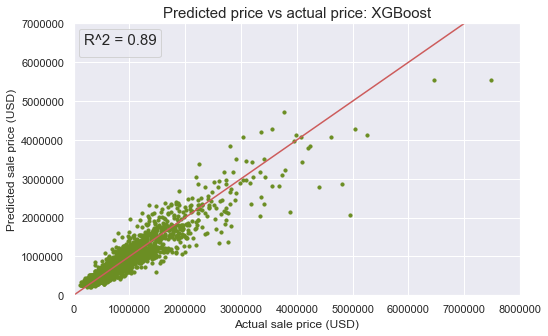

In [286]:
fig = plt.figure(figsize=(8, 5))


# Build a scatterplot
x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')

plt.scatter(y_test, preds,s=10, c='olivedrab')
plt.xlim(0,8000000)
plt.ylim(0,7000000)

plt.ticklabel_format(useOffset=False, style='plain')

# Label it nicely
plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.title('Predicted price vs actual price: XGBoost', fontsize=15)

plt.legend(title='R^2 = 0.89', title_fontsize = 15) 
plt.show()

#### Fit XGBoost with log response

In [50]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=features, label=y_log)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":6}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["alpha"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=6, num_boost_round=15, metrics="rmse", as_pandas=True, seed=123,early_stopping_rounds = 10)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2      rmse
0    1  0.075936
1   10  0.085847
2  100  0.118903


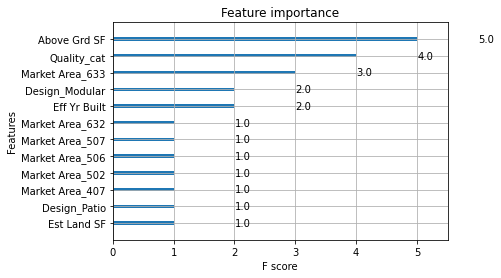

In [51]:
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

In [52]:
R2 = 1- ((0.075936**2)*len(y_log))/ (np.sum((y_log- np.mean(y_log))**2))
print('transformed XGBoost R2: ', R2)

transformed XGBoost R2:  0.8734540047494046


### Conclusion on XGBoost: Not as good as linear regression with log transformed response still.


## Random forest

In [158]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = number of trees in the forest <br>
max_features = max number of features considered for splitting a node <br>
max_depth = max number of levels in each decision tree <br>
min_samples_split = min number of data points placed in a node before the node is split <br>
min_samples_leaf = min number of data points allowed in a leaf node <br>
bootstrap = method for sampling data points (with or without replacement) <br>

In [159]:
model = RandomForestRegressor()
# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]
estimator
preds = model.predict(X_test)

R2 = 1 - (np.sum((y_test-preds)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Random Forest Test set R^2: ",R2)

Random Forest Test set R^2:  0.9123875475934853


In [160]:
train_preds = model.predict(X_train)
R2 = 1 - (np.sum((y_train-train_preds)**2)/np.sum((y_train-np.mean(y_train))**2))
print("Random Forest Test set R^2: ",R2)

Random Forest Test set R^2:  0.9842980837150874


In [161]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = [1, 0.3]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': [1, 0.3], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [162]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [1, 0.3],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [163]:
rf_random.best_params_


{'n_estimators': 30,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 0.3,
 'max_depth': 60,
 'bootstrap': False}

n_estimators= 30,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 0.3,
 max_depth= 60,
 bootstrap= False

In [164]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 66121.3632 degrees.
Accuracy = 91.14%.
Model Performance
Average Error: 61498.4644 degrees.
Accuracy = 91.60%.
Improvement of 0.50%.
[CV] END bootstrap=True, max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=30, max_features=0.3, min_samples_leaf=4, min_samples_split=5, n_estimators=40; total time=   1.7s
[CV] END bootstrap=False, max_depth=50, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END bootstrap=True, max_depth=70, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=90, max_features=0.3, min_samples_leaf=1, min_samples_split=5, n_estimators=40; total time=   1.9s
[CV] END bootstrap=False, max_depth=30, max_features=0.3, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   1.6s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=10, max_features=0.3, min_samples_leaf=2, min_samples_split=5, n_estimators=60; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=100, max_features=0.3, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2.3s
[CV] END bootstrap=False, max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, max_features=0.3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=50, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=90; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, max_features=0.3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END bootstrap=True, max_depth=80, max_features=0.3, m

So, according to our hyperparameter optimization, we can gain 0.5% in accuracy improvement. I think we could use either base model or optimized model, but the selected model is much more restrictive yet yields similar performance.  Let's use selected optimal model!

### 6-fold cross validation

In [165]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = RandomForestRegressor(n_estimators= 30,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 0.3,
 max_depth= 60,
 bootstrap= False)

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X_train, y_train, cv=kf)

# Print scores
print(cv_scores)

# Print the mean
print("Mean R^2: ",np.mean(cv_scores))

# Print the standard deviation
print("Standard deviation R^2: ",np.std(cv_scores))

# Print the 95% confidence interval
print(np.percentile(cv_scores, [2.5, 97.5]))

[0.90428913 0.86724592 0.90556654 0.89026768 0.89923042 0.88712444]
Mean R^2:  0.8922873538889678
Standard deviation R^2:  0.013079204638458948
[0.86973074 0.90540686]


The 95% CI for the R^2 is [0.869, 0.905], and there is some variation between the folds, which tells that algorithms is still a little sensitive to splits. 

In [287]:
final_model= RandomForestRegressor(n_estimators= 30,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 0.3,
 max_depth= 60,
 bootstrap= False)
# Train
final_model.fit(X_train, y_train)
# Extract single tree
estimator = final_model.estimators_[5]
estimator
preds = final_model.predict(X_test)

R2 = 1 - (np.sum((y_test-preds)**2)/np.sum((y_test-np.mean(y_test))**2))
print("Random Forest Test set R^2: ", R2)

Random Forest Test set R^2:  0.9171632908629157


In [288]:
preds

array([605863.83664194, 459991.37692877, 384997.04498748, ...,
       404464.64373058, 601504.23908701, 551340.01892711])

In [289]:
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE of the base model: {rmse:.3f}")



RMSE of the base model: 127313.041


With no splits, R^2 is at its highest level of 0.912. So when choosing an algorithms we'll account for that. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


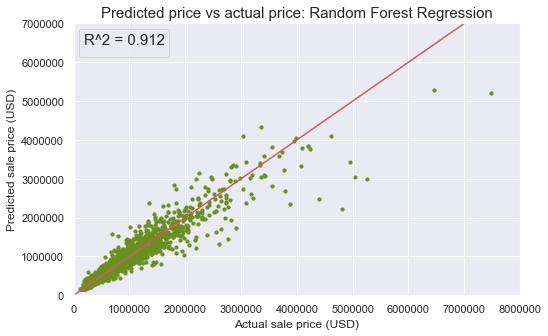

In [226]:

sns.set()
# Plot the predictions
#plt.figure()

fig = plt.figure(figsize=(8, 5))


# Build a scatterplot
x = np.linspace(1,8000000,)
plt.plot(x,x, color = 'indianred')

plt.scatter(y_test, preds,s=10, c='olivedrab')
plt.xlim(0,8000000)
plt.ylim(0,7000000)

plt.ticklabel_format(useOffset=False, style='plain')

# Label it nicely
plt.xlabel('Actual sale price (USD)')
plt.ylabel('Predicted sale price (USD)')
plt.title('Predicted price vs actual price: Random Forest Regression', fontsize=15)

plt.legend(title='R^2 = 0.912', title_fontsize = 15) 
plt.show()

In [ ]:
So we can see that from the 